In [13]:
import normalizing_flows
from normalizing_flows import masked_autoregressive_flow as maf
from normalizing_flows import inverse_autoregressive_flow as iaf
from normalizing_flows import real_NVP as nvp
from normalizing_flows.flow_trainer import train
import importlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow_probability import distributions as tfd
from sklearn.datasets import make_moons
import tensorflow as tf

plt.style.use('default')
plt.figure(figsize=(5,5))
plt.style.use('default') 
plt.rcParams.update({'font.size': 15}) 
importlib.reload(normalizing_flows)

<module 'normalizing_flows' from '/home/arshak/Desktop/Normalizing Flows/normalizing_flows/__init__.py'>

<Figure size 500x500 with 0 Axes>

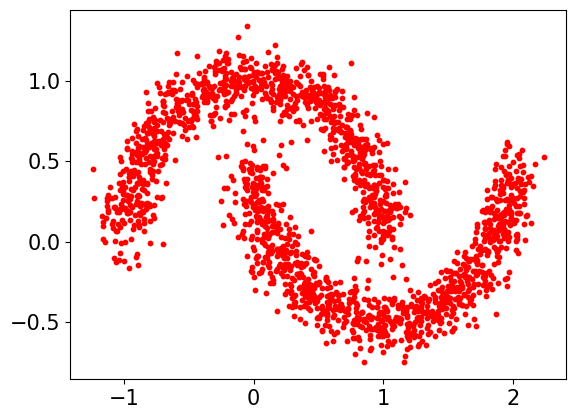

In [42]:
data_set = "Moons"
#data_set = "U"
if data_set == "Moons":
    X = make_moons(2000, noise=0.1)
    X = np.float32(X[0])
    plt.scatter(X[:, 0], X[:, 1], s=10, color='red')
    plt.show()
if data_set == "U":
    x2_dist = tfd.Normal(loc=0., scale=4.)
    x2_samples = x2_dist.sample(2000)
    x1 = tfd.Normal(loc=.25 * tf.square(x2_samples),
                        scale=tf.ones(2000, dtype=tf.float32))
    x1_samples = x1.sample()
    x_samples = tf.stack([x1_samples, x2_samples], axis=1)
    X = x_samples.numpy()/40.0
    xlim, ylim = [-2, 2], [-2, 2]
    plt.scatter(X[:, 0], X[:, 1], s=10, color='red')
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
    plt.show()



In [43]:
model_NVP = nvp.NVP(output_dim = 2, num_masked = 1, num_bijectors = 10, hidden = 50, batch_norm = 0)
train(model_NVP, X, 1500)

Epoch: 0 , Loss: 2.4237485 , Time: 4.378908395767212
Epoch: 100 , Loss: 1.4360827 , Time: 0.9200983047485352
Epoch: 200 , Loss: 1.2157301 , Time: 0.8597924709320068
Epoch: 300 , Loss: 1.0538379 , Time: 0.8430194854736328
Epoch: 400 , Loss: 0.9873536 , Time: 0.8427829742431641
Epoch: 500 , Loss: 0.95636135 , Time: 0.8415040969848633
Epoch: 600 , Loss: 0.9453668 , Time: 0.8408808708190918
Epoch: 700 , Loss: 0.934605 , Time: 0.84773850440979
Epoch: 800 , Loss: 0.93239516 , Time: 0.8415298461914062
Epoch: 900 , Loss: 0.92590255 , Time: 0.8424530029296875
Epoch: 1000 , Loss: 0.9213717 , Time: 0.8399112224578857
Epoch: 1100 , Loss: 0.9155743 , Time: 0.8492674827575684
Epoch: 1200 , Loss: 0.9125563 , Time: 0.9541254043579102
Epoch: 1300 , Loss: 0.91847724 , Time: 0.8438057899475098
Epoch: 1400 , Loss: 0.9102954 , Time: 0.8455550670623779


In [47]:
model_MAF = maf.MAF(output_dim = 2, num_bijectors = 5, hidden = 20, batch_norm = 0)
train(model_MAF, X, 1500)

Epoch: 0 , Loss: 34.69859 , Time: 2.5685017108917236
Epoch: 100 , Loss: 1.9190487 , Time: 0.2703111171722412
Epoch: 200 , Loss: 1.8759102 , Time: 0.2761342525482178
Epoch: 300 , Loss: 1.8470049 , Time: 0.26564455032348633
Epoch: 400 , Loss: 1.8211209 , Time: 0.2672255039215088
Epoch: 500 , Loss: 1.795486 , Time: 0.2682657241821289
Epoch: 600 , Loss: 1.7632625 , Time: 0.2682332992553711
Epoch: 700 , Loss: 1.7331343 , Time: 0.27553820610046387
Epoch: 800 , Loss: 1.7143118 , Time: 0.2629730701446533
Epoch: 900 , Loss: 1.705736 , Time: 0.2633061408996582
Epoch: 1000 , Loss: 1.7007927 , Time: 0.2655205726623535
Epoch: 1100 , Loss: 1.696865 , Time: 0.2658705711364746
Epoch: 1200 , Loss: 1.6935519 , Time: 0.2619602680206299
Epoch: 1300 , Loss: 1.6907461 , Time: 0.2655608654022217
Epoch: 1400 , Loss: 1.688251 , Time: 0.27256226539611816


In [53]:
model_IAF = iaf.IAF(output_dim = 2, num_bijectors = 3, hidden = 10, batch_norm = 0)
train(model_IAF, X, 1500)

Epoch: 0 , Loss: 2.5968854 , Time: 2.510376214981079
Epoch: 100 , Loss: 40.151585 , Time: 9.972985982894897
Epoch: 200 , Loss: 19.645 , Time: 9.972493410110474
Epoch: 300 , Loss: 14.059486 , Time: 13.30513048171997
Epoch: 400 , Loss: 11.50919 , Time: 124.97500896453857
Epoch: 500 , Loss: 10.073749 , Time: 9.370384216308594
Epoch: 600 , Loss: 9.161761 , Time: 9.53102421760559
Epoch: 700 , Loss: 8.533646 , Time: 9.727720499038696
Epoch: 800 , Loss: 8.074955 , Time: 9.850003719329834
Epoch: 900 , Loss: 7.724551 , Time: 85.07727909088135
Epoch: 1000 , Loss: 7.446996 , Time: 62.38662123680115
Epoch: 1100 , Loss: 7.2204456 , Time: 9.487560749053955
Epoch: 1200 , Loss: 7.0307436 , Time: 9.553093671798706
Epoch: 1300 , Loss: 6.8683395 , Time: 9.760855674743652
Epoch: 1400 , Loss: 6.7265887 , Time: 41.36284375190735


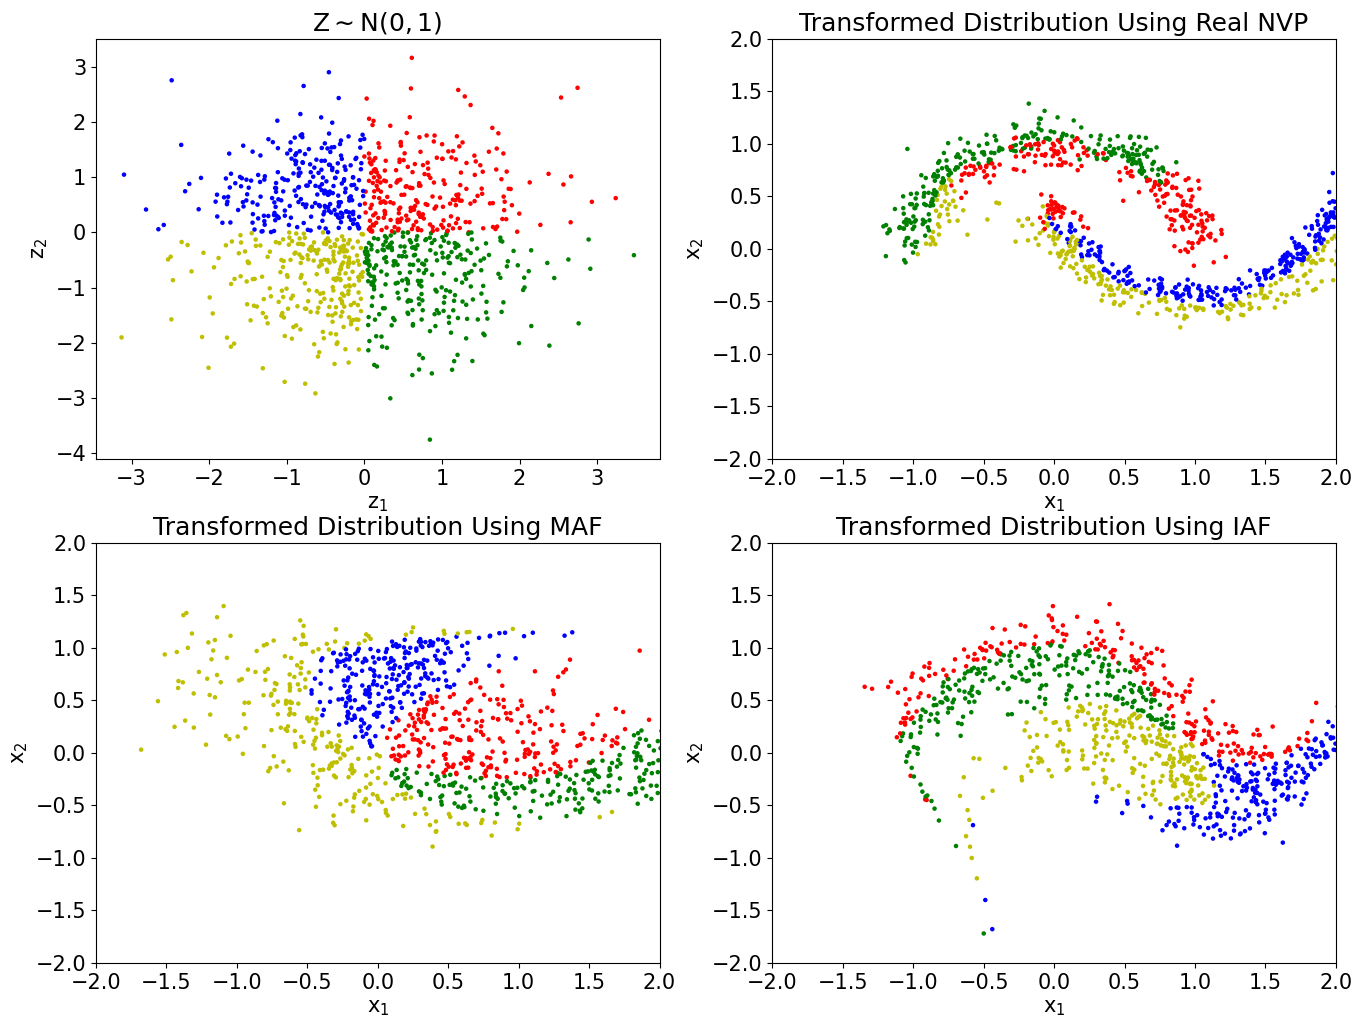

In [50]:
Z = np.float32(np.random.normal(0,1,(1000,2)))
cols = []
for i in range(1000):
    if (Z[i,0] > 0 and Z[i,1] > 0):
        cols.append('r')
    elif (Z[i,0] < 0 and Z[i,1] > 0):
        cols.append('b')
    elif (Z[i,0] < 0 and Z[i,1] < 0):
        cols.append('y')
    else:
        cols.append('g')

plt.figure(figsize=(16,12))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.subplot(2,2,1)
plt.scatter(Z[:, 0], Z[:, 1], s=5,c=cols)
plt.title('$Z \sim N(0,1)$')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

Xs = model_NVP.flow.bijector.forward(Z)
plt.subplot(2,2,2)
plt.title('Transformed Distribution Using Real NVP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)

Xs = model_MAF.flow.bijector.forward(Z)
plt.subplot(2,2,3)
plt.title('Transformed Distribution Using MAF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)

Xs = model_IAF.flow.bijector.forward(Z)
plt.subplot(2,2,4)
plt.title('Transformed Distribution Using IAF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)
plt.show()



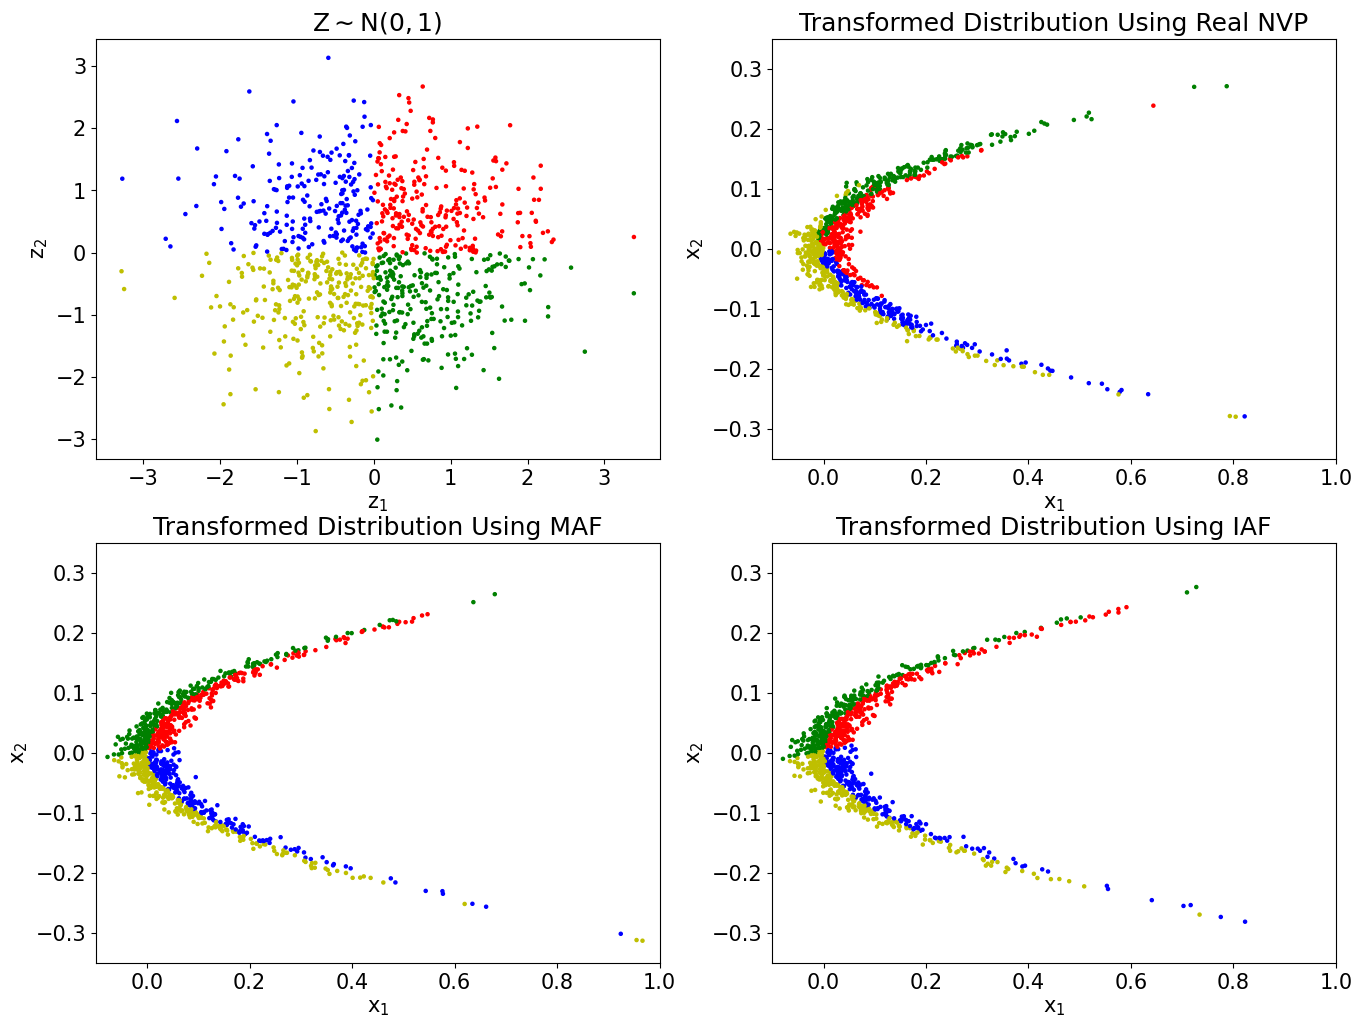

In [41]:
Z = np.float32(np.random.normal(0,1,(1000,2)))
cols = []
for i in range(1000):
    if (Z[i,0] > 0 and Z[i,1] > 0):
        cols.append('r')
    elif (Z[i,0] < 0 and Z[i,1] > 0):
        cols.append('b')
    elif (Z[i,0] < 0 and Z[i,1] < 0):
        cols.append('y')
    else:
        cols.append('g')

plt.figure(figsize=(16,12))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.subplot(2,2,1)
plt.scatter(Z[:, 0], Z[:, 1], s=5,c=cols)
plt.title('$Z \sim N(0,1)$')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

Xs = model_NVP.flow.bijector.forward(Z)
plt.subplot(2,2,2)
plt.title('Transformed Distribution Using Real NVP')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)

Xs = model_MAF.flow.bijector.forward(Z)
plt.subplot(2,2,3)
plt.title('Transformed Distribution Using MAF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)

Xs = model_IAF.flow.bijector.forward(Z)
plt.subplot(2,2,4)
plt.title('Transformed Distribution Using IAF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
if data_set == "U":
    plt.xlim(-0.1,1)
    plt.ylim(-0.35,0.35)
if data_set == "Moons":
    plt.xlim(-2,2)
    plt.ylim(-2,2)
plt.show()

